# Analysis of Logistic Regression models trained with _all_ features (trad + arg) 
# force (aug)
## id: 06111210

### force = data generated using the prompt force_TSBS which forces the model to choose one answer 

+ on 10545 instances
+ on same splits as for the transformers models (coqa_force_aug)

In [1]:
import os
import json
import pandas as pd
import pprint as pp

In [2]:
PROJECT_DIR = os.path.dirname(os.path.dirname(os.getcwd()))
STATS_DIR = os.path.join(PROJECT_DIR, "classification/stats/")

PROJECT_DIR

'/mount/studenten-temp1/users/dpgo/xai-thesis'

In [3]:
run_file_map = {
    'col-rfe': os.path.join(STATS_DIR, "06111210_col-rfe_all_10454.json"),
    'rfe': os.path.join(STATS_DIR, "06111210_rfe_all_10454.json"),
}

In [4]:
def visualize_results(stats_file, n_features=10):
    
    # load file with results
    with open(os.path.join(PROJECT_DIR, stats_file), "r") as f:
        stats = json.load(f)
        coef_dict, scores_dict = stats['coefficients'], stats['scores']

    # metrics
    # round floats in scores_dict to 2 decimals
    for key, value in scores_dict.items():
        if isinstance(value, float):
            scores_dict[key] = round(value, 2)
        elif isinstance(value, dict):
            for inner_key, inner_value in value.items():
                if isinstance(inner_value, float):
                    scores_dict[key][inner_key] = round(inner_value, 2)
                if inner_key == 'support':
                    scores_dict[key][inner_key] = int(inner_value)
    
    #pp.pprint(scores_dict, indent=4)
    
    # feature importances
    coef_df = pd.DataFrame(coef_dict.items(), columns=['feature', 'coefficient'])
    coef_df = coef_df.sort_values(by='coefficient', ascending=False)

    top_n_pos_features = coef_df.head(n_features)
    top_n_neg_features = coef_df.tail(n_features)
    top_features_df = pd.merge(top_n_pos_features, top_n_neg_features, how='outer')

    top_features_df.plot(x='feature', y='coefficient', kind='barh', figsize=(20, 10))

    return top_features_df

## No collinear features + Recursive Feature Elimination (RFE)

|           | precision | recall | f1-score | support |
|-----------|-----------|--------|----------|---------|
| accuracy  | 0.73      |  -     |    -     | 1046.00 |
| macro avg | 0.67      | 0.62   | 0.63     | 1046.00 |
| weighted avg | 0.71  | 0.73   | 0.71     | 1046.00 |
| False     | 0.57      | 0.36   | 0.44     | 315.00  |
| True      | 0.76      | 0.88   | 0.82     | 731.00  |


#### Number of features = 606

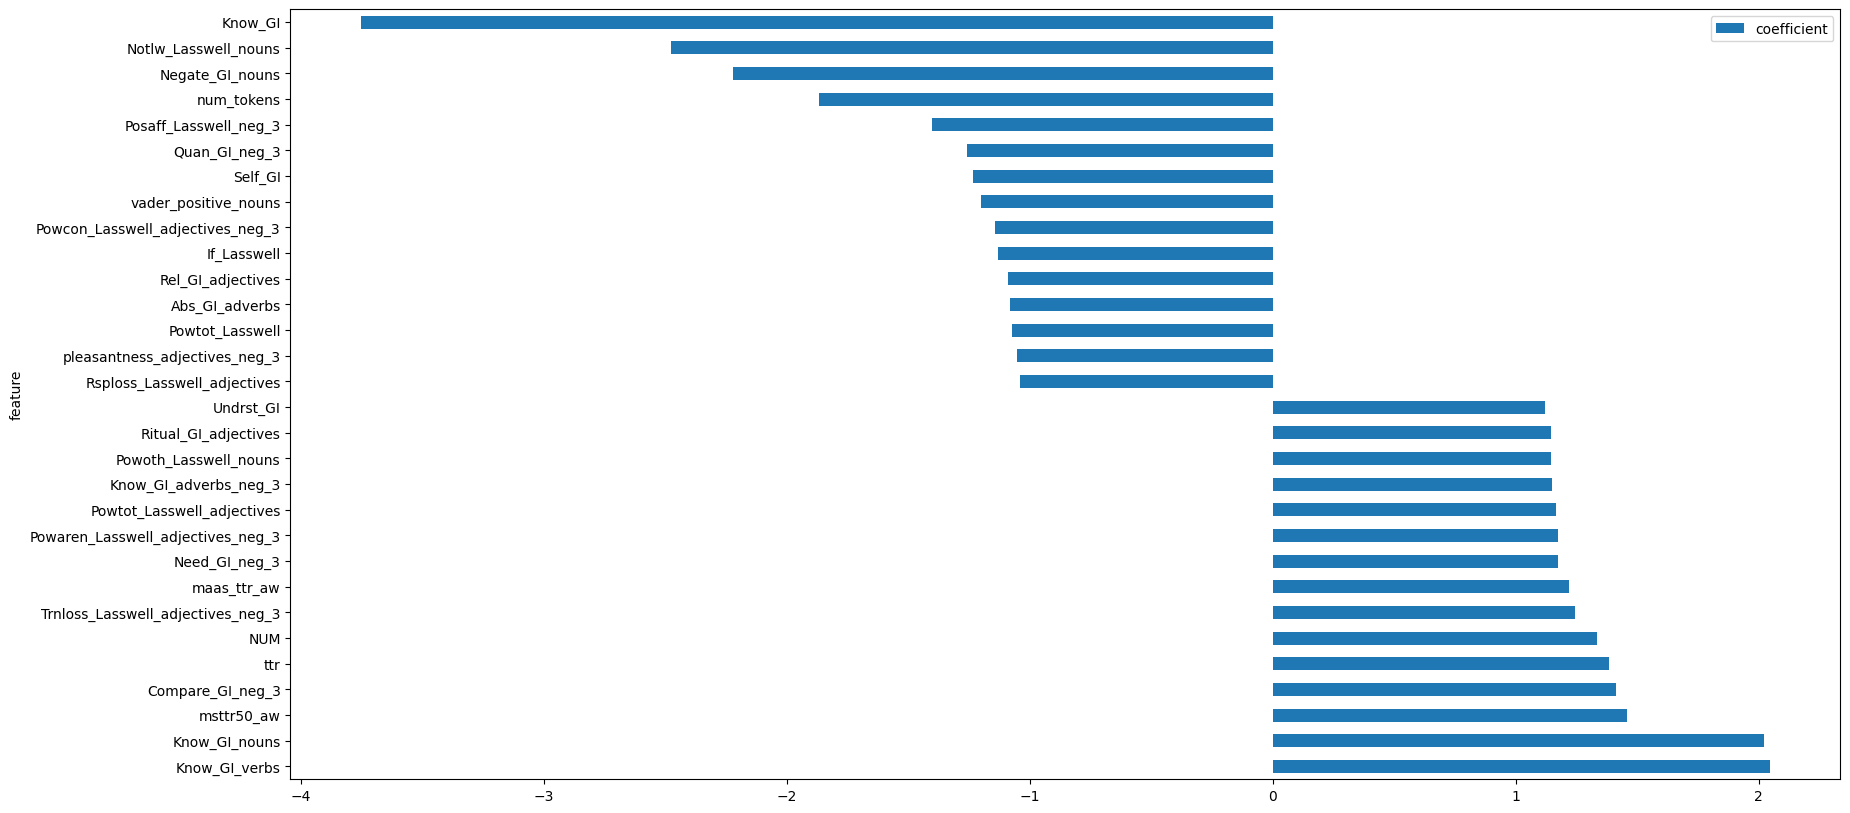

In [5]:
top_col_rfe = visualize_results(run_file_map['col-rfe'], n_features=15)
#top_col_rfe

## RFE only

prediction-based selection only

|           | precision | recall | f1-score | support |
|-----------|-----------|--------|----------|---------|
| accuracy  | 0.75      |  -     |    -     | 1046.00 |
| macro avg | 0.71      | 0.66   | 0.67     | 1046.00 |
| weighted avg | 0.74  | 0.75   | 0.74     | 1046.00 |
| False     | 0.65      | 0.41   | 0.50     | 315.00  |
| True      | 0.78      | 0.90   | 0.84     | 731.00  |


#### Number of features = 717

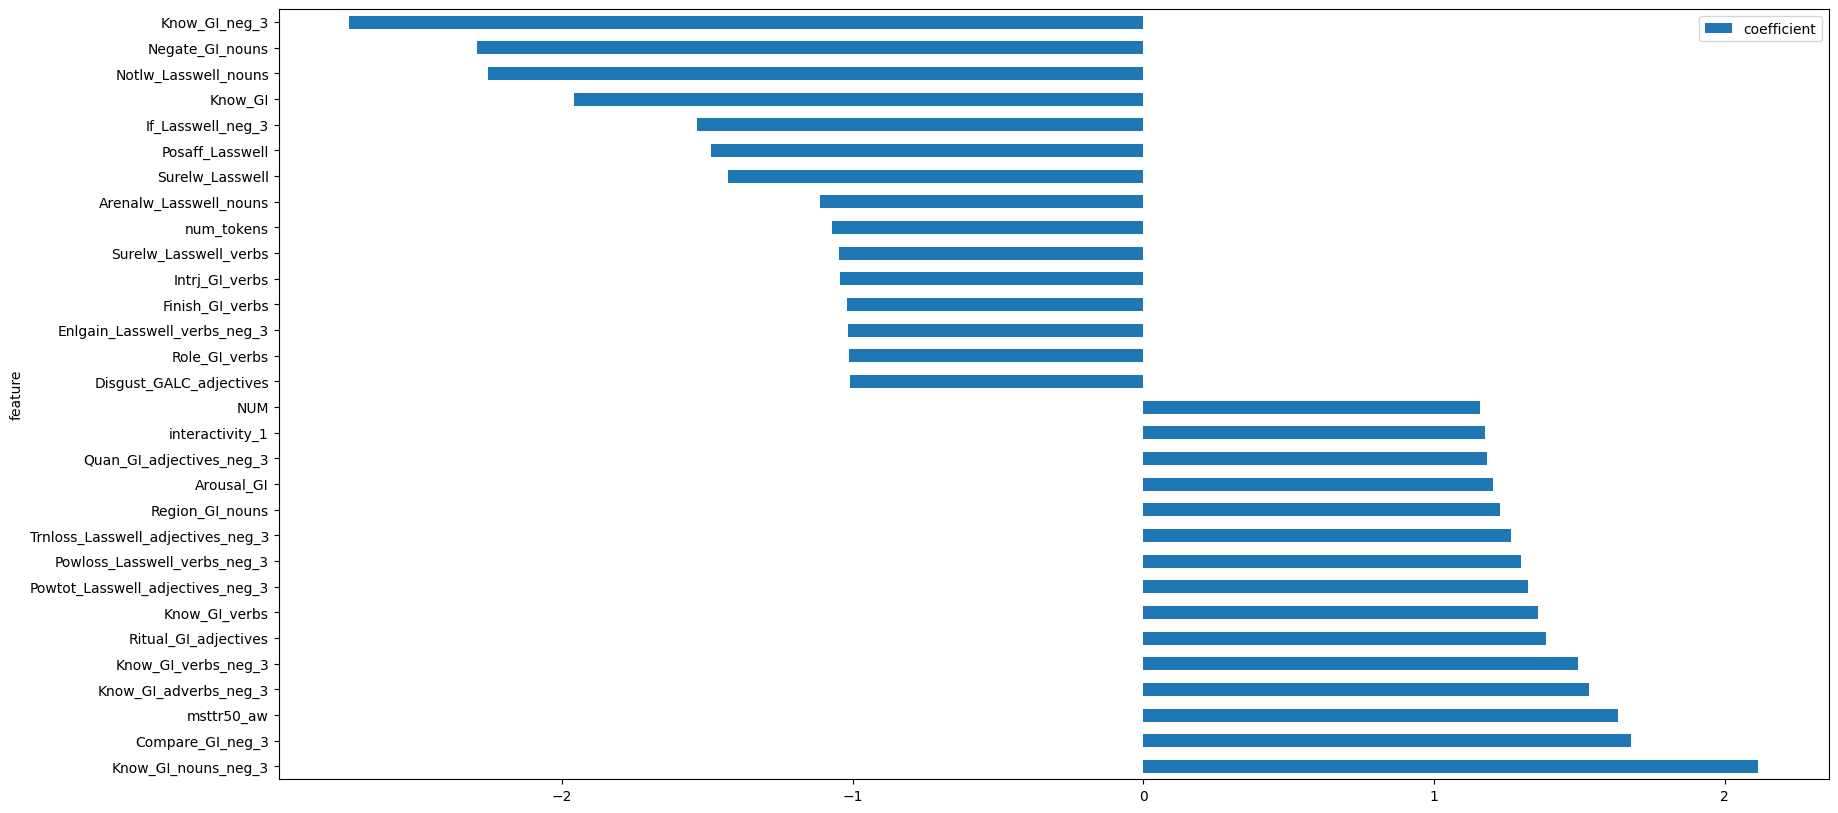

In [6]:
top_rfe = visualize_results(run_file_map['rfe'], n_features=15)
#top_rfe